In [1]:
from transf.ds_clean import clean_ds 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

2024-05-05 20:56:44.502525: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-05 20:56:44.502779: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 20:56:44.504970: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 20:56:44.529791: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-05 20:56:45.048422: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

## Cargamos datos de prueba y modelos entrenados 

In [2]:
df_clean = clean_ds(pd.read_csv('data/aapl_5m_test.csv')).dropna()
model_buy = load_model("transf/model_buy.keras")
model_sell = load_model("transf/model_sell.keras")

2024-05-05 20:56:49.988162: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-05 20:56:49.988377: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Indicadores usados 

In [3]:
closes = df_clean[[
    'Close', 'X_t-1', 'X_t-2', 'X_t-3', 'X_t-4', 'X_t-5',
    'RSI_5', 'RSI_10', 'RSI_15', 'RSI_28', 'RSI_32',
    'EMA_5', 'EMA_10', 'EMA_15', 'EMA_28', 'EMA_32',
    'MACD_line_12_26_9', 'MACD_signal_12_26_9', 'MACD_diff_12_26_9',
    'MACD_line_5_35_5', 'MACD_signal_5_35_5', 'MACD_diff_5_35_5',
    'MACD_line_7_14_3', 'MACD_signal_7_14_3', 'MACD_diff_7_14_3',
    'Bollinger_mavg_20', 'Bollinger_hband_20', 'Bollinger_lband_20',
    'Bollinger_mavg_10', 'Bollinger_hband_10', 'Bollinger_lband_10',
    'Bollinger_mavg_30', 'Bollinger_hband_30', 'Bollinger_lband_30',
    'Stoch_%K_14', 'Stoch_%D_14',
    'Stoch_%K_10', 'Stoch_%D_10',
    'Stoch_%K_20', 'Stoch_%D_20',
    'ATR_14', 'ATR_10', 'ATR_20',
    'CCI_10', 'CCI_20', 'CCI_40',  # CCI with different windows
    'SAR_0.02_0.2', 'SAR_0.01_0.1', 'SAR_0.03_0.3',  # Parabolic SAR with different step/max_step
    'Ichimoku_A_9_26_52', 'Ichimoku_B_9_26_52',  # Ichimoku Cloud with one setting
    'Ichimoku_A_7_22_44', 'Ichimoku_B_7_22_44',  # Another setting
    'Ichimoku_A_12_30_60', 'Ichimoku_B_12_30_60',  # And another setting  
    'MFI_10', 'MFI_14', 'MFI_20',  # Money Flow Index with different windows
    'CMF_10', 'CMF_20', 'CMF_30',  # Chaikin Money Flow with different windows
    'Williams_7', 'Williams_14', 'Williams_28',
    'Ultimate_Osc_7_14_28', 'Ultimate_Osc_5_10_20', 'Ultimate_Osc_10_20_30',
    'TRIX_15', 'TRIX_30', 'TRIX_45',
    'Keltner_Center_20', 'Keltner_High_20', 'Keltner_Low_20',
    'Keltner_Center_10', 'Keltner_High_10', 'Keltner_Low_10',
    'Keltner_Center_40', 'Keltner_High_40', 'Keltner_Low_40',
    'ROC_10', 'ROC_20', 'ROC_30',
]]
scaler = StandardScaler()
closes_scaled = (scaler.fit_transform(closes))
features = closes.shape[1]
X = closes_scaled.reshape(-1, features, 1)

In [4]:
closes_5 = df_clean[['Timestamp', 'Close']]

## Generamos señales de venta y Compra 

In [5]:
closes_5["Y_buy"] = model_buy.predict(X) > 0.5
closes_5["Y_sell"] = model_sell.predict(X) > 0.5

188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step


/tmp/ipykernel_377310/1196136457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closes_5["Y_buy"] = model_buy.predict(X) > 0.5


188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step


/tmp/ipykernel_377310/1196136457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closes_5["Y_sell"] = model_sell.predict(X) > 0.5


In [6]:
closes_5

,Timestamp,Close,Y_buy,Y_sell
133,1672858800,126.769996,True,False
134,1672859100,126.589996,True,False
135,1672859400,126.720001,True,False
136,1672859700,127.080001,True,False
137,1672860000,126.529998,True,False
...,...,...,...,...
9829,1688400900,192.210006,False,True
9830,1688401200,192.119995,False,True
9833,1688402100,192.100006,False,True
9834,1688402400,192.225494,False,True


## Corremos estrategia de Trading

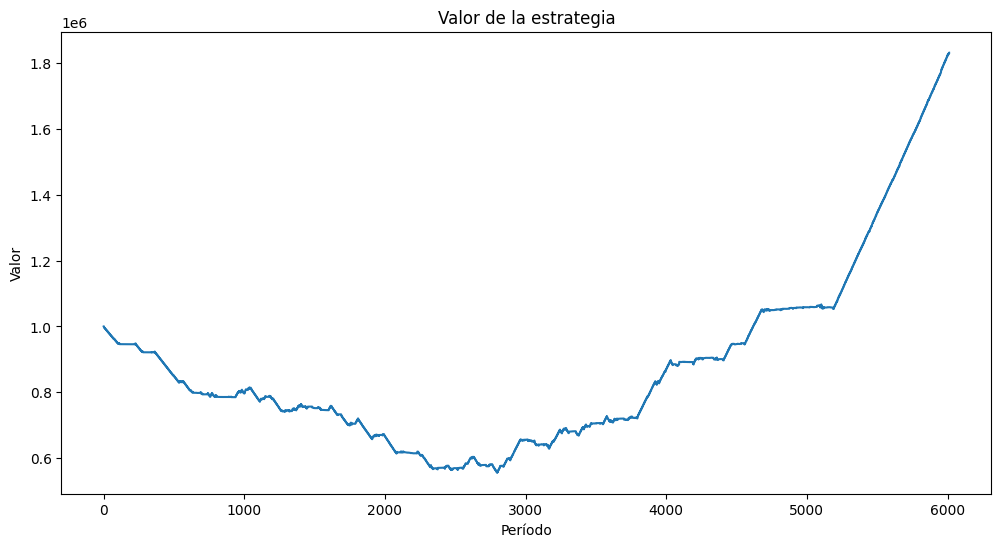

Valor de la estrategia:  1831709.3941449046


In [8]:
cash = 1_000_000
active_operations = []
com = 0.00125  # comision en GBM
strategy_value = [1_000_000]
stop_loss = 0.03451137396108058
take_profit = 0.007335240907359543
n_shares = 9

class Operation:
    def __init__(self, operation_type, bought_at, timestamp, n_shares, stop_loss, take_profit):
        self.operation_type = operation_type
        self.bought_at = bought_at
        self.timestamp = timestamp
        self.n_shares = n_shares
        # self.sold_at = None
        self.stop_loss = stop_loss
        self.take_profit = take_profit

for i, row in closes_5.iterrows():
    # Close Operations
    temp_operations = []
    for op in active_operations:
        if op.operation_type == 'Long':
            if op.stop_loss > row.Close:
                cash += row.Close * op.n_shares * (1 - com)
            elif op.take_profit < row.Close:
                cash += row.Close * op.n_shares * (1 - com)
            else:
                temp_operations.append(op)
        elif op.operation_type == 'Short':
            if op.stop_loss < row.Close:
                cash -= row.Close * op.n_shares * (1 + com)
            elif op.take_profit > row.Close:
                cash -= row.Close * op.n_shares * (1 + com)
            else:
                temp_operations.append(op)
    active_operations = temp_operations

    # Open Operations
    if row.Y_buy:
        n_shares = n_shares
        stop_loss = row.Close * (1 - stop_loss)
        take_profit = row.Close * (1 + take_profit)
        active_operations.append(
            Operation('Long', row.Close, row.Timestamp, n_shares, stop_loss, take_profit))
        cash -= row.Close * n_shares * (1 + com)
    elif row.Y_sell:
        n_shares = n_shares
        stop_loss = row.Close * (1 + stop_loss)
        take_profit = row.Close * (1 - take_profit)
        active_operations.append(
            Operation('Short', row.Close, row.Timestamp, n_shares, stop_loss, take_profit))
        cash += row.Close * n_shares * (1 - com)

    total_value = len(active_operations) * row.Close 
    strategy_value.append(cash + total_value)
    
plt.figure(figsize=(12, 6))
plt.plot(strategy_value)
plt.title('Valor de la estrategia')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.show()
print("Valor de la estrategia: ", strategy_value[-1])